In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Decision Tree Classifier

In [3]:
data=pd.read_csv("heart_v2.csv")
data['heart disease']=data['heart disease'].replace({1:'no',0:'yes'})

In [4]:
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,no
1,67,0,115,564,yes
2,57,1,124,261,no
3,64,1,128,263,yes
4,74,0,120,269,yes


In [5]:
data.isna().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            270 non-null    int64 
 1   sex            270 non-null    int64 
 2   BP             270 non-null    int64 
 3   cholestrol     270 non-null    int64 
 4   heart disease  270 non-null    object
dtypes: int64(4), object(1)
memory usage: 10.7+ KB


In [7]:
#data['Species']=data['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})

In [8]:
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,no
1,67,0,115,564,yes
2,57,1,124,261,no
3,64,1,128,263,yes
4,74,0,120,269,yes


In [9]:
X= data.drop('heart disease', axis = 1)

y= data['heart disease']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
#criterion(gini or entropy)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=4,min_samples_leaf=10)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [13]:
import graphviz
from sklearn import tree

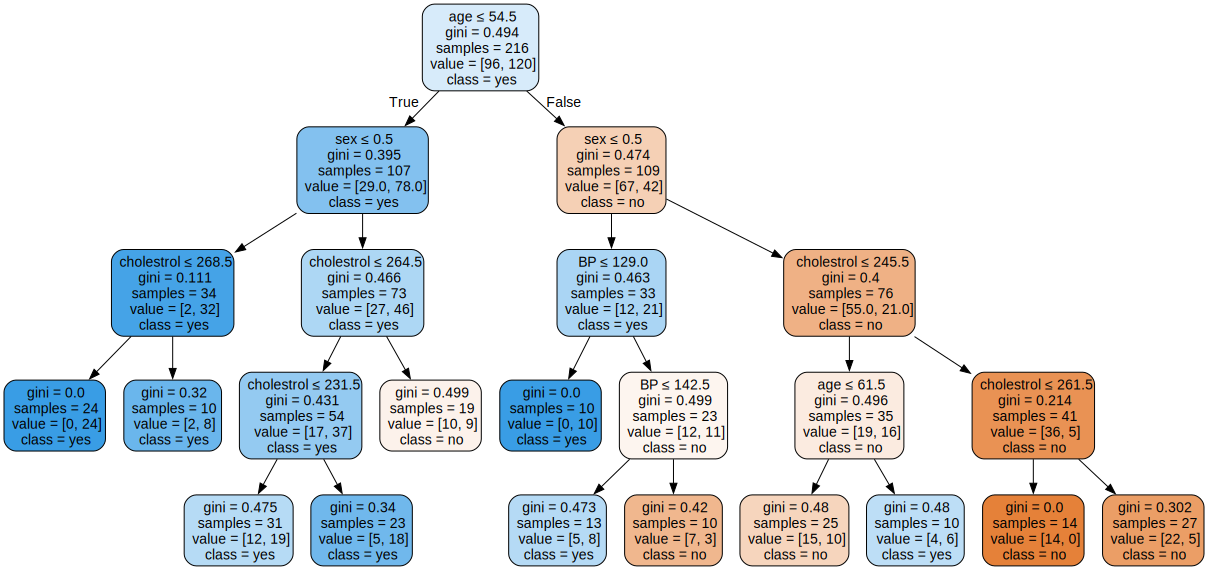

In [14]:
dot=tree.export_graphviz(dtree,feature_names=X_train.columns,
                         class_names=y_train,filled=True,rounded=True,
                        special_characters=True)
g=graphviz.Source(dot)
g

In [15]:
y_train_pred=dtree.predict(X_train)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
cm=confusion_matrix(y_train,y_train_pred)
cr=classification_report(y_train,y_train_pred)

In [18]:
print(cm)

[[68 28]
 [27 93]]


In [19]:
print(cr)

              precision    recall  f1-score   support

          no       0.72      0.71      0.71        96
         yes       0.77      0.78      0.77       120

    accuracy                           0.75       216
   macro avg       0.74      0.74      0.74       216
weighted avg       0.75      0.75      0.75       216



In [22]:
y_test_pred=ddtree.predict(X_test)

In [23]:
cmm=confusion_matrix(y_test,y_test_pred)
crr=classification_report(y_test,y_test_pred)

In [24]:
print(cmm)

[[19  5]
 [11 19]]


In [25]:
print(crr)

              precision    recall  f1-score   support

          no       0.63      0.79      0.70        24
         yes       0.79      0.63      0.70        30

    accuracy                           0.70        54
   macro avg       0.71      0.71      0.70        54
weighted avg       0.72      0.70      0.70        54



# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier( max_depth=5, min_samples_leaf=10)

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10)

In [30]:
sample_tree = rf.estimators_[10]

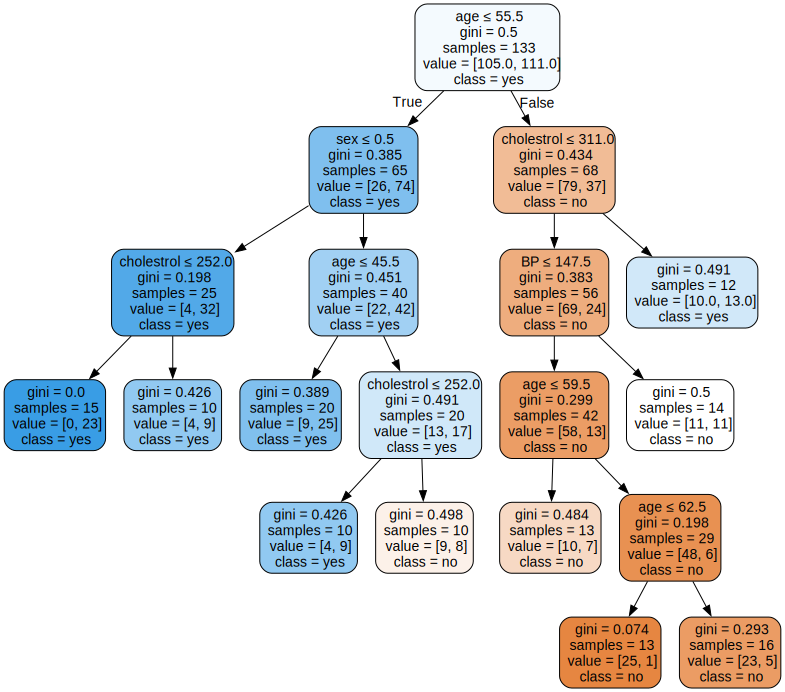

In [31]:
rfc=tree.export_graphviz(sample_tree,feature_names=X_test.columns,
                         class_names=y_test,filled=True,rounded=True,
                        special_characters=True)
gg=graphviz.Source(rfc)
gg

In [32]:
y_train_rfc= rf.predict(X_train)
y_test_rfc = rf.predict(X_test)

In [33]:
cm_train_rfc=confusion_matrix(y_train,y_train_rfc)
cr_train_cfl=classification_report(y_train,y_train_rfc)
print(cm_train_rfc)
print(cr_train_cfl)

[[ 62  34]
 [ 19 101]]
              precision    recall  f1-score   support

          no       0.77      0.65      0.70        96
         yes       0.75      0.84      0.79       120

    accuracy                           0.75       216
   macro avg       0.76      0.74      0.75       216
weighted avg       0.76      0.75      0.75       216



In [34]:
cm_test_rfc=confusion_matrix(y_test,y_test_rfc)
cr_test_cfl=classification_report(y_test,y_test_rfc)

In [35]:
print(cm_test_rfc)
print(cr_test_cfl)

[[ 9 15]
 [ 7 23]]
              precision    recall  f1-score   support

          no       0.56      0.38      0.45        24
         yes       0.61      0.77      0.68        30

    accuracy                           0.59        54
   macro avg       0.58      0.57      0.56        54
weighted avg       0.59      0.59      0.58        54



# ensemble

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
m1 = LogisticRegression()
m2 = KNeighborsClassifier()
m3 = DecisionTreeClassifier(random_state=42, max_depth=4)

In [39]:
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [40]:
y_train_pred = (m1.predict(X_train) + m2.predict(X_train) + m3.predict(X_train))
y_test_pred = (m1.predict(X_test) + m2.predict(X_test) + m3.predict(X_test))

In [41]:
y_train_nrfc= m3.predict(X_train)
y_test_nrfc = m3.predict(X_test)

In [42]:
cm_train_nrfc=confusion_matrix(y_train,y_train_nrfc)
cr_train_ncfl=classification_report(y_train,y_train_nrfc)
print(cm_train_nrfc)
print(cr_train_ncfl)

[[ 65  31]
 [ 19 101]]
              precision    recall  f1-score   support

          no       0.77      0.68      0.72        96
         yes       0.77      0.84      0.80       120

    accuracy                           0.77       216
   macro avg       0.77      0.76      0.76       216
weighted avg       0.77      0.77      0.77       216



In [43]:
cm_test_nrfc=confusion_matrix(y_test,y_test_nrfc)
cr_test_ncfl=classification_report(y_test,y_test_nrfc)
print(cm_test_nrfc)
print(cr_test_ncfl)

[[ 8 16]
 [ 5 25]]
              precision    recall  f1-score   support

          no       0.62      0.33      0.43        24
         yes       0.61      0.83      0.70        30

    accuracy                           0.61        54
   macro avg       0.61      0.58      0.57        54
weighted avg       0.61      0.61      0.58        54

